<a href="https://colab.research.google.com/github/smtwtfs/WiDS_Datathon/blob/2025/ye.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load library

import numpy as np
import pandas as pd
import seaborn as sns

import os
import matplotlib.pyplot as plt

import sklearn
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, accuracy_score, confusion_matrix, roc_curve
from scipy.stats import zscore, pearsonr, uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, StratifiedKFold, RandomizedSearchCV

from scipy.io import loadmat

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer



from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier


# Read train data

In [ ]:
train_metrices = pd.read_csv('/content/drive/MyDrive/WiDS_datathon_2025/TRAIN/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv')


In [ ]:
train_metrices.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.093473,0.146902,0.067893,0.015141,0.070221,0.063997,0.055382,-0.035335,0.068583,...,0.003404,-0.010359,-0.050968,-0.014365,0.128066,0.112646,-0.058980,0.028228,0.133582,0.143372
1,WHWymJu6zNZi,0.029580,0.179323,0.112933,0.038291,0.104899,0.064250,0.008488,0.077505,-0.004750,...,-0.008409,-0.008479,0.020891,0.017754,0.094040,0.035141,0.032537,0.075007,0.115350,0.138200
2,4PAQp1M6EyAo,-0.051580,0.139734,0.068295,0.046991,0.111085,0.026978,0.151377,0.021198,0.083721,...,0.053245,-0.028003,0.028773,0.024556,0.166343,0.058925,0.035485,0.063661,0.042862,0.162162
3,obEacy4Of68I,0.016273,0.204702,0.115980,0.043103,0.056431,0.057615,0.055773,0.075030,0.001033,...,-0.023918,-0.005356,0.018607,0.016193,0.072955,0.130135,0.056120,0.084784,0.114148,0.190584
4,s7WzzDcmDOhF,0.065771,0.098714,0.097604,0.112988,0.071139,0.085607,0.019392,-0.036403,-0.020375,...,0.066439,-0.076680,-0.047530,-0.031443,0.221213,0.007343,0.005763,0.083820,0.079582,0.067269


In [ ]:
train_solution = pd.read_excel('/content/drive/MyDrive/WiDS_datathon_2025/TRAIN/TRAINING_SOLUTIONS.xlsx')


In [ ]:
train_solution.head()

,participant_id,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,1,1
1,CPaeQkhcjg7d,1,0
2,Nb4EetVPm3gs,1,0
3,p4vPhVu91o4b,1,1
4,M09PXs7arQ5E,1,1


In [ ]:
train_categorical = pd.read_excel('/content/drive/MyDrive/WiDS_datathon_2025/TRAIN/TRAIN_CATEGORICAL_METADATA.xlsx')


In [ ]:
train_categorical

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0
...,...,...,...,...,...,...,...,...,...,...
1208,Atx7oub96GXS,2019,1,0.0,0,2,21,40,21,40
1209,groSbUfkQngM,2016,1,0.0,0,1,18,35,0,0
1210,zmxGvIrOD0bt,2015,1,1.0,2,1,18,20,0,0
1211,rOmWFuJCud5G,2018,3,0.0,8,3,21,40,18,45


In [ ]:
train_quantitative = pd.read_excel('/content/drive/MyDrive/WiDS_datathon_2025/TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx')


In [ ]:
train_quantitative.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,6,1,5,0,5,1,0,10,NaN
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,18,6,8,7,8,10,4,5,NaN
2,Nb4EetVPm3gs,-46.67,14,4,10,35,16,10,29,1,14,2,8,5,7,6,4,9,8.239904
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,24,4,16,9,10,8,4,6,NaN
4,M09PXs7arQ5E,0.00,14,5,15,40,20,24,28,1,18,4,11,4,10,7,3,9,8.940679


# Read test data

In [ ]:
test_metrices = pd.read_csv('/content/drive/MyDrive/WiDS_datathon_2025/TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv')
test_categorical=pd.read_excel('/content/drive/MyDrive/WiDS_datathon_2025/TEST/TEST_CATEGORICAL.xlsx')
test_quantitative=pd.read_excel('/content/drive/MyDrive/WiDS_datathon_2025/TEST/TEST_QUANTITATIVE_METADATA.xlsx')


# Exploratory Data Analysis

In [ ]:
# get shape and data type
def initial_analysis(df):
    """
    Given a dataframe produces a simple report on initial data analytics
    Params:
        - df
    Returns:
        - Shape of dataframe records and columns
        - Columns and data types
    """
    print('Report of Initial Data Analysis:\n')
    print(f'Shape of dataframe: {df.shape}')
    print(f'Features and Data Types: \n {df.dtypes}')

In [ ]:
initial_analysis(train_solution)

Report of Initial Data Analysis:

Shape of dataframe: (1213, 3)
Features and Data Types: 
 participant_id    object
ADHD_Outcome       int64
Sex_F              int64
dtype: object


In [ ]:
initial_analysis(train_quantitative)


Report of Initial Data Analysis:

Shape of dataframe: (1213, 19)
Features and Data Types: 
 participant_id                 object
EHQ_EHQ_Total                 float64
ColorVision_CV_Score            int64
APQ_P_APQ_P_CP                  int64
APQ_P_APQ_P_ID                  int64
APQ_P_APQ_P_INV                 int64
APQ_P_APQ_P_OPD                 int64
APQ_P_APQ_P_PM                  int64
APQ_P_APQ_P_PP                  int64
SDQ_SDQ_Conduct_Problems        int64
SDQ_SDQ_Difficulties_Total      int64
SDQ_SDQ_Emotional_Problems      int64
SDQ_SDQ_Externalizing           int64
SDQ_SDQ_Generating_Impact       int64
SDQ_SDQ_Hyperactivity           int64
SDQ_SDQ_Internalizing           int64
SDQ_SDQ_Peer_Problems           int64
SDQ_SDQ_Prosocial               int64
MRI_Track_Age_at_Scan         float64
dtype: object


In [ ]:
# check missing data

def percent_missing(df):
    """
    Given a dataframe it calculates the percentage of missing records per column
    Params:
        - df
    Returns:
        - Dictionary of column name and percentage of missing records
    """
    col=list(df.columns)
    perc=[round(df[c].isna().mean()*100,2) for c in col]
    miss_dict=dict(zip(col,perc))
    return miss_dict

In [ ]:
percent_missing(train_quantitative)

{'participant_id': 0.0,
 'EHQ_EHQ_Total': 0.0,
 'ColorVision_CV_Score': 0.0,
 'APQ_P_APQ_P_CP': 0.0,
 'APQ_P_APQ_P_ID': 0.0,
 'APQ_P_APQ_P_INV': 0.0,
 'APQ_P_APQ_P_OPD': 0.0,
 'APQ_P_APQ_P_PM': 0.0,
 'APQ_P_APQ_P_PP': 0.0,
 'SDQ_SDQ_Conduct_Problems': 0.0,
 'SDQ_SDQ_Difficulties_Total': 0.0,
 'SDQ_SDQ_Emotional_Problems': 0.0,
 'SDQ_SDQ_Externalizing': 0.0,
 'SDQ_SDQ_Generating_Impact': 0.0,
 'SDQ_SDQ_Hyperactivity': 0.0,
 'SDQ_SDQ_Internalizing': 0.0,
 'SDQ_SDQ_Peer_Problems': 0.0,
 'SDQ_SDQ_Prosocial': 0.0,
 'MRI_Track_Age_at_Scan': 29.68}

In [ ]:
percent_missing(train_categorical)

{'participant_id': 0.0,
 'Basic_Demos_Enroll_Year': 0.0,
 'Basic_Demos_Study_Site': 0.0,
 'PreInt_Demos_Fam_Child_Ethnicity': 0.91,
 'PreInt_Demos_Fam_Child_Race': 0.0,
 'MRI_Track_Scan_Location': 0.0,
 'Barratt_Barratt_P1_Edu': 0.0,
 'Barratt_Barratt_P1_Occ': 0.0,
 'Barratt_Barratt_P2_Edu': 0.0,
 'Barratt_Barratt_P2_Occ': 0.0}

In [ ]:
# Two missing columns need attention:
# 'MRI_Track_Age_at_Scan': 29.68% missing
# 'PreInt_Demos_Fam_Child_Ethnicity': 0.91% missing

In [ ]:
train_quantitative.describe()

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
count,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,853.000000
mean,58.876917,13.164880,3.781533,13.205276,39.374279,17.785655,16.393240,25.246496,2.059357,12.122836,2.307502,7.557296,4.073372,5.497939,4.565540,2.258038,7.683430,11.245678
std,49.855501,2.780624,1.376700,3.811772,6.245928,3.764112,5.376994,3.950529,2.023322,6.577207,2.167549,4.166627,2.819731,2.836764,3.519634,2.090414,2.190295,3.234372
min,-100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.600000,14.000000,3.000000,11.000000,36.000000,16.000000,13.000000,23.000000,0.000000,7.000000,1.000000,4.000000,2.000000,4.000000,2.000000,0.000000,6.000000,8.803901
50%,76.670000,14.000000,3.000000,13.000000,40.000000,18.000000,16.000000,26.000000,2.000000,12.000000,2.000000,7.000000,4.000000,6.000000,4.000000,2.000000,8.000000,10.739219
75%,93.400000,14.000000,4.000000,16.000000,43.000000,20.000000,19.000000,28.000000,3.000000,17.000000,4.000000,10.000000,6.000000,8.000000,7.000000,4.000000,10.000000,13.460871
max,100.000000,14.000000,12.000000,28.000000,50.000000,28.000000,37.000000,30.000000,10.000000,34.000000,10.000000,20.000000,10.000000,10.000000,17.000000,9.000000,10.000000,21.564453


In [ ]:
train_quantitative.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   participant_id              1213 non-null   object 
 1   EHQ_EHQ_Total               1213 non-null   float64
 2   ColorVision_CV_Score        1213 non-null   int64  
 3   APQ_P_APQ_P_CP              1213 non-null   int64  
 4   APQ_P_APQ_P_ID              1213 non-null   int64  
 5   APQ_P_APQ_P_INV             1213 non-null   int64  
 6   APQ_P_APQ_P_OPD             1213 non-null   int64  
 7   APQ_P_APQ_P_PM              1213 non-null   int64  
 8   APQ_P_APQ_P_PP              1213 non-null   int64  
 9   SDQ_SDQ_Conduct_Problems    1213 non-null   int64  
 10  SDQ_SDQ_Difficulties_Total  1213 non-null   int64  
 11  SDQ_SDQ_Emotional_Problems  1213 non-null   int64  
 12  SDQ_SDQ_Externalizing       1213 non-null   int64  
 13  SDQ_SDQ_Generating_Impact   1213 

In [ ]:
train_solution.describe()

,ADHD_Outcome,Sex_F
count,1213.000000,1213.000000
mean,0.685078,0.342951
std,0.464676,0.474891
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


# Understand the target variable

In [ ]:
# correlation: -0.130836

corr_table = train_solution[['ADHD_Outcome','Sex_F']].corr(method='pearson')
print(corr_table)

# svm = sns.heatmap(corr_table)
# figure = svm.get_figure()
# figure.savefig('Correlation.png', dpi=300, bbox_inches='tight')



              ADHD_Outcome     Sex_F
ADHD_Outcome      1.000000 -0.130836
Sex_F            -0.130836  1.000000


In [ ]:
# in traning set, more men than women; also more men are ADHD
# imbalance data.

value_counts = train_solution[['ADHD_Outcome','Sex_F']].value_counts()

# Calculate percentages
percentages = value_counts / len(train_solution) * 100

# Display results
print("Unique Values:\n", value_counts)
print("\nPercentages:\n", percentages)

Unique Values:
 ADHD_Outcome  Sex_F
1             0        581
              1        250
0             0        216
              1        166
Name: count, dtype: int64

Percentages:
 ADHD_Outcome  Sex_F
1             0        47.897774
              1        20.610058
0             0        17.807090
              1        13.685078
Name: count, dtype: float64


# Understand the categorical data

In [ ]:
# check how many different answers in each columns

train_categorical.nunique()

    #   print (train_categorical[i] .value_counts())
    #   print (train_categorical[i].value_counts(normalize=True) * 100)

,0
participant_id,1213
Basic_Demos_Enroll_Year,6
Basic_Demos_Study_Site,4
PreInt_Demos_Fam_Child_Ethnicity,4
PreInt_Demos_Fam_Child_Race,10
MRI_Track_Scan_Location,5
Barratt_Barratt_P1_Edu,8
Barratt_Barratt_P1_Occ,10
Barratt_Barratt_P2_Edu,8
Barratt_Barratt_P2_Occ,10


In [ ]:
# for specific column, check different answers and frequency

train_categorical['Barratt_Barratt_P1_Edu'].value_counts()

,count
Barratt_Barratt_P1_Edu,
21,470
18,421
15,162
12,97
9,28
0,15
6,15
3,5


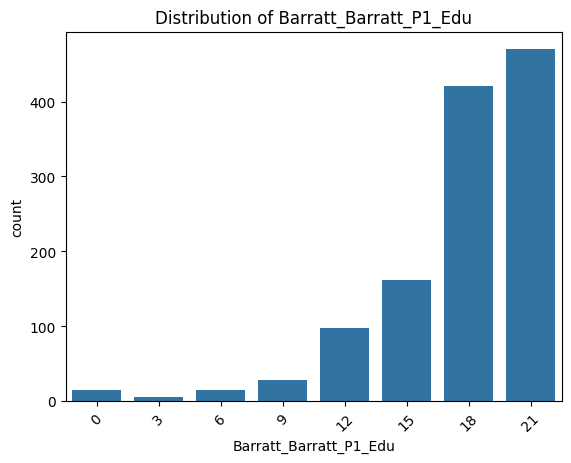

In [ ]:
# visulize distribution

sns.countplot(x='Barratt_Barratt_P1_Edu', data=train_categorical[['Barratt_Barratt_P1_Edu']])
plt.title(f"Distribution of Barratt_Barratt_P1_Edu")
plt.xticks(rotation=45)
plt.show()

# Understand Quantitative Variable

In [ ]:
list(train_quantitative)[1:]

['EHQ_EHQ_Total',
 'ColorVision_CV_Score',
 'APQ_P_APQ_P_CP',
 'APQ_P_APQ_P_ID',
 'APQ_P_APQ_P_INV',
 'APQ_P_APQ_P_OPD',
 'APQ_P_APQ_P_PM',
 'APQ_P_APQ_P_PP',
 'SDQ_SDQ_Conduct_Problems',
 'SDQ_SDQ_Difficulties_Total',
 'SDQ_SDQ_Emotional_Problems',
 'SDQ_SDQ_Externalizing',
 'SDQ_SDQ_Generating_Impact',
 'SDQ_SDQ_Hyperactivity',
 'SDQ_SDQ_Internalizing',
 'SDQ_SDQ_Peer_Problems',
 'SDQ_SDQ_Prosocial',
 'MRI_Track_Age_at_Scan']

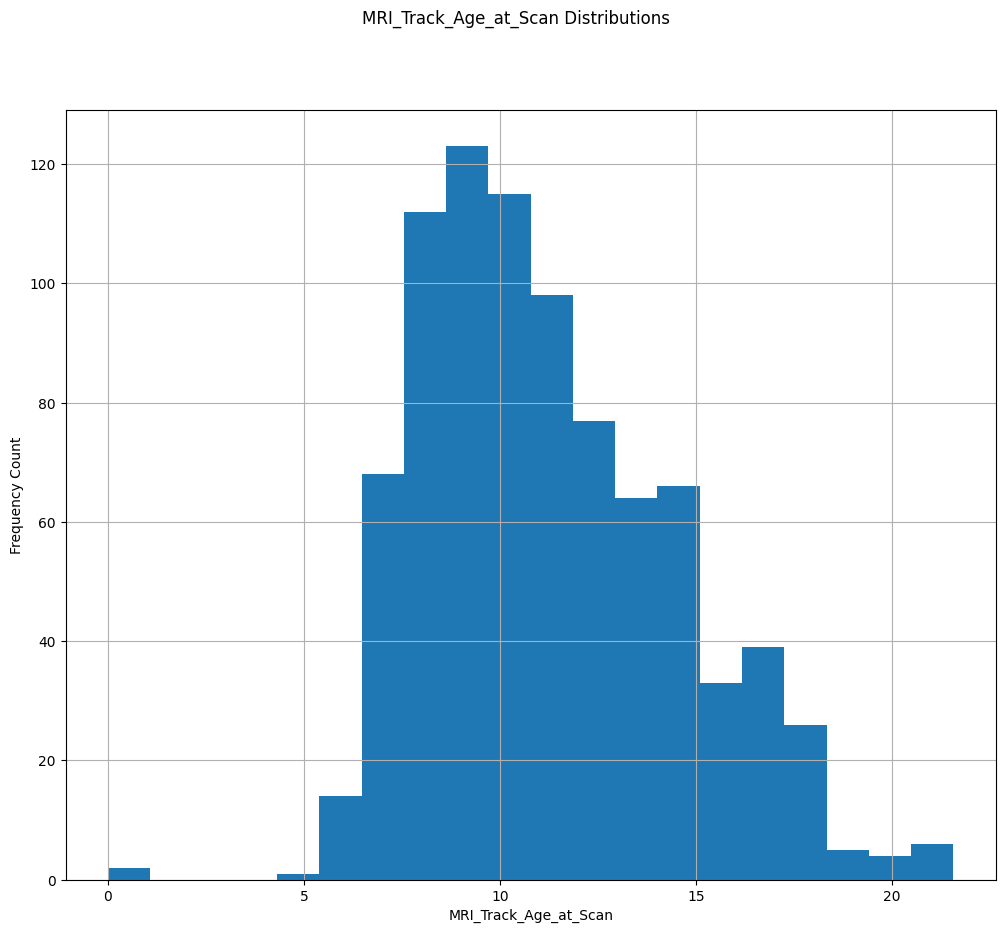

In [ ]:
# visulization

# Distribution of MRI_Track_Age_at_Scan
train_quantitative['MRI_Track_Age_at_Scan'].hist(figsize=(12, 10), bins=20)
plt.suptitle("MRI_Track_Age_at_Scan Distributions")
plt.xlabel('MRI_Track_Age_at_Scan')
plt.ylabel('Frequency Count')
plt.show()

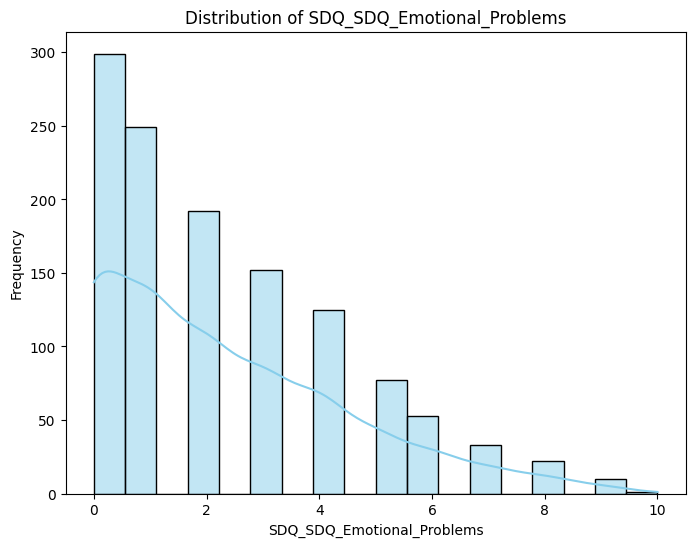

In [ ]:
# Plot the distribution of the SDQ_SDQ_Emotional_Problems variable
plt.figure(figsize=(8, 6))
sns.histplot(train_quantitative['SDQ_SDQ_Emotional_Problems'], kde=True, color='skyblue')
plt.title('Distribution of SDQ_SDQ_Emotional_Problems')
plt.xlabel('SDQ_SDQ_Emotional_Problems')
plt.ylabel('Frequency')
plt.show()

# one hot encoding

In [ ]:
# convert to categorical
for col in train_categorical.select_dtypes(include=['int','float']).columns:
    train_categorical[col] = train_categorical[col].astype('category')

# Creating a list of all of the columns except the first
columns_to_encode = train_categorical.columns[1:].tolist()

# Print the columns to encode
print("Columns to encode:", columns_to_encode)

Columns to encode: ['Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ']


In [ ]:
train_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   participant_id                    1213 non-null   object  
 1   Basic_Demos_Enroll_Year           1213 non-null   category
 2   Basic_Demos_Study_Site            1213 non-null   category
 3   PreInt_Demos_Fam_Child_Ethnicity  1202 non-null   category
 4   PreInt_Demos_Fam_Child_Race       1213 non-null   category
 5   MRI_Track_Scan_Location           1213 non-null   category
 6   Barratt_Barratt_P1_Edu            1213 non-null   category
 7   Barratt_Barratt_P1_Occ            1213 non-null   category
 8   Barratt_Barratt_P2_Edu            1213 non-null   category
 9   Barratt_Barratt_P2_Occ            1213 non-null   category
dtypes: category(9), object(1)
memory usage: 22.9+ KB


In [ ]:
# encoding categorical data
train_categorical_encoded = pd.get_dummies(train_categorical[columns_to_encode], drop_first=True)
train_categorical_encoded = train_categorical_encoded.map(lambda x: 1 if x is True else (0 if x is False else x))


In [ ]:
# Combine encoded columns with the rest of the DataFrame
train_categorical_final = pd.concat([train_categorical.drop(columns=columns_to_encode), train_categorical_encoded], axis=1)

# ensure it looks correct
train_categorical_final.head()

,participant_id,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,Basic_Demos_Study_Site_4,PreInt_Demos_Fam_Child_Ethnicity_1.0,...,Barratt_Barratt_P2_Edu_21,Barratt_Barratt_P2_Occ_5,Barratt_Barratt_P2_Occ_10,Barratt_Barratt_P2_Occ_15,Barratt_Barratt_P2_Occ_20,Barratt_Barratt_P2_Occ_25,Barratt_Barratt_P2_Occ_30,Barratt_Barratt_P2_Occ_35,Barratt_Barratt_P2_Occ_40,Barratt_Barratt_P2_Occ_45
0,UmrK0vMLopoR,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,CPaeQkhcjg7d,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Nb4EetVPm3gs,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,p4vPhVu91o4b,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M09PXs7arQ5E,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# do the samething for test. Make sure all categories in train are included

# convert our int variables to categories
for col in test_categorical.select_dtypes(include=['int','float']).columns:
    test_categorical[col] = test_categorical[col].astype('category')

# Encode categorical variables in test
test_categorical_encoded = pd.get_dummies(test_categorical[columns_to_encode], drop_first=True)
test_categorical_encoded = test_categorical_encoded.map(lambda x: 1 if x is True else (0 if x is False else x))

# Ensure test_encoded has the same columns as train_encoded
missing_cols = set(train_categorical_encoded.columns) - set(test_categorical_encoded.columns)
for col in missing_cols:
    test_categorical_encoded[col] = 0  # Add missing columns with 0 values

# Ensure test_encoded columns are in the same order as train_encoded
test_categorical_encoded = test_categorical_encoded.reindex(columns=train_categorical_encoded.columns, fill_value=0)

# Combine encoded columns with the rest of the DataFrame
test_categorical_final = pd.concat([test_categorical.drop(columns=columns_to_encode), test_categorical_encoded], axis=1)

test_categorical_final.head()

,participant_id,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,Basic_Demos_Study_Site_4,PreInt_Demos_Fam_Child_Ethnicity_1.0,...,Barratt_Barratt_P2_Edu_21,Barratt_Barratt_P2_Occ_5,Barratt_Barratt_P2_Occ_10,Barratt_Barratt_P2_Occ_15,Barratt_Barratt_P2_Occ_20,Barratt_Barratt_P2_Occ_25,Barratt_Barratt_P2_Occ_30,Barratt_Barratt_P2_Occ_35,Barratt_Barratt_P2_Occ_40,Barratt_Barratt_P2_Occ_45
0,Cfwaf5FX7jWK,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,vhGrzmvA3Hjq,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ULliyEXjy4OV,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,LZfeAb1xMtql,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,EnFOUv0YK1RG,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_metrices.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.093473,0.146902,0.067893,0.015141,0.070221,0.063997,0.055382,-0.035335,0.068583,...,0.003404,-0.010359,-0.050968,-0.014365,0.128066,0.112646,-0.058980,0.028228,0.133582,0.143372
1,WHWymJu6zNZi,0.029580,0.179323,0.112933,0.038291,0.104899,0.064250,0.008488,0.077505,-0.004750,...,-0.008409,-0.008479,0.020891,0.017754,0.094040,0.035141,0.032537,0.075007,0.115350,0.138200
2,4PAQp1M6EyAo,-0.051580,0.139734,0.068295,0.046991,0.111085,0.026978,0.151377,0.021198,0.083721,...,0.053245,-0.028003,0.028773,0.024556,0.166343,0.058925,0.035485,0.063661,0.042862,0.162162
3,obEacy4Of68I,0.016273,0.204702,0.115980,0.043103,0.056431,0.057615,0.055773,0.075030,0.001033,...,-0.023918,-0.005356,0.018607,0.016193,0.072955,0.130135,0.056120,0.084784,0.114148,0.190584
4,s7WzzDcmDOhF,0.065771,0.098714,0.097604,0.112988,0.071139,0.085607,0.019392,-0.036403,-0.020375,...,0.066439,-0.076680,-0.047530,-0.031443,0.221213,0.007343,0.005763,0.083820,0.079582,0.067269


In [ ]:
# #  Check Distribution of All Values

# all_values = train_metrices.iloc[:, 1:].values.flatten()

# sns.histplot(all_values, kde=True, bins=50)
# plt.title("Distribution of All Values")
# plt.xlabel("Value")
# plt.ylabel("Frequency")
# plt.show()

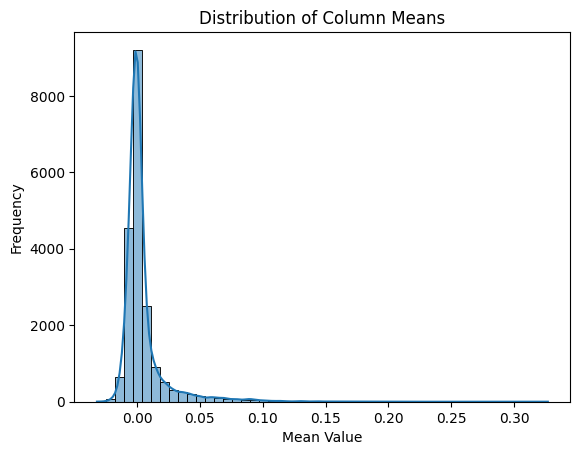

In [ ]:
# Check Distribution of Column Means

column_means = train_metrices.iloc[:, 1:].mean(axis=0)  # Compute mean for each column (ignore first column)

# Plot histogram
sns.histplot(column_means, kde=True, bins=50)
plt.title("Distribution of Column Means")
plt.xlabel("Mean Value")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# print("Summary Statistics of All Values:")
# print(pd.Series(all_values).describe())

print("\nSummary Statistics of Column Means:")
print(column_means.describe())


Summary Statistics of Column Means:
count    19900.000000
mean         0.004487
std          0.018225
min         -0.031934
25%         -0.003452
50%          0.000029
75%          0.004581
max          0.326986
dtype: float64


In [ ]:
# # use percentile

# # Compute thresholds for top 10% and bottom 10%
# top_10_threshold = np.percentile(column_means, 90)  # 90th percentile
# bottom_10_threshold = np.percentile(column_means, 10)  # 10th percentile

# # Select columns
# top_10_cols = column_means[column_means >= top_10_threshold].index
# bottom_10_cols = column_means[column_means <= bottom_10_threshold].index

# # Create new DataFrames with selected columns
# train_metrices_top_10 = train_metrices[['participant_id'] + list(top_10_cols)]
# train_metrices_bottom_10 = train_metrices[['participant_id'] + list(bottom_10_cols)]

# for i in range(10, 100,10):
#   print (i)
#   print(np.percentile(column_means,i))

In [ ]:
# Select columns where mean is greater than 0.05 or less than -0.05

selected_cols = column_means[(column_means > 0.05) | (column_means < -0.05)].index

# Create a new DataFrame with both high and low mean columns
train_metrices_selected = train_metrices[['participant_id'] + list(selected_cols)]


# high_mean_cols = column_means[column_means > 0.05].index
# low_mean_cols = column_means[column_means < -0.05].index

# # Create new DataFrames with filtered columns
# train_metrices_high_mean = train_metrices[['participant_id'] + list(high_mean_cols)]
# train_metrices_low_mean = train_metrices[['participant_id'] + list(low_mean_cols)]

In [ ]:
train_metrices_selected.describe()

,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_29thcolumn,0throw_100thcolumn,0throw_102thcolumn,1throw_3thcolumn,...,189throw_197thcolumn,190throw_196thcolumn,190throw_197thcolumn,193throw_194thcolumn,194throw_195thcolumn,196throw_197thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
count,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,...,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,0.060553,0.122315,0.060268,0.069722,0.091007,0.066852,0.062763,0.132437,0.072917,0.139890,...,0.096155,0.093495,0.050054,0.059630,0.085035,0.115171,0.058144,0.093527,0.089403,0.128946
std,0.064178,0.054026,0.057495,0.044222,0.049189,0.046864,0.045424,0.046648,0.050403,0.072911,...,0.050459,0.056554,0.051441,0.044949,0.049776,0.057128,0.057674,0.054594,0.058036,0.058490
min,-0.183279,-0.059932,-0.145566,-0.072043,-0.079184,-0.105722,-0.077205,-0.008782,-0.157162,-0.116920,...,-0.074542,-0.129204,-0.167785,-0.112945,-0.099878,-0.070094,-0.131455,-0.085566,-0.204160,-0.083077
25%,0.018482,0.086102,0.026548,0.042462,0.057614,0.036934,0.033132,0.101253,0.042600,0.089210,...,0.061532,0.056952,0.015894,0.031421,0.052934,0.080291,0.022316,0.059621,0.053224,0.090459
50%,0.058276,0.123220,0.061339,0.067066,0.086494,0.067247,0.058377,0.130668,0.074416,0.137729,...,0.093297,0.094177,0.051407,0.059315,0.084181,0.113640,0.059151,0.093397,0.088612,0.127913
75%,0.100103,0.154518,0.099056,0.096504,0.119404,0.095117,0.089827,0.159243,0.105256,0.185113,...,0.126372,0.128308,0.085373,0.086188,0.116817,0.150524,0.095192,0.127144,0.127613,0.166523
max,0.321522,0.390895,0.278429,0.317500,0.316811,0.270018,0.255086,0.385766,0.249146,0.455875,...,0.305701,0.301575,0.218156,0.302224,0.268091,0.375635,0.322084,0.348153,0.267162,0.414304


In [ ]:
# do the same thing for test
test_metrices_selected = test_metrices[train_metrices_selected.columns]
test_metrices_selected.describe()

,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_29thcolumn,0throw_100thcolumn,0throw_102thcolumn,1throw_3thcolumn,...,189throw_197thcolumn,190throw_196thcolumn,190throw_197thcolumn,193throw_194thcolumn,194throw_195thcolumn,196throw_197thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
count,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,...,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000
mean,0.219970,0.610695,0.419458,0.480795,0.530394,0.496573,0.400496,0.696291,0.505599,0.461444,...,0.511629,0.459015,0.345870,0.397605,0.496231,0.558894,0.380367,0.503837,0.487597,0.557431
std,0.249959,0.163408,0.248612,0.256404,0.167916,0.178327,0.202754,0.136216,0.209763,0.211577,...,0.180486,0.193679,0.212233,0.197708,0.155932,0.156629,0.195547,0.170680,0.183347,0.173604
min,-0.713362,-0.118109,-0.376194,-0.379396,-0.022415,-0.113225,-0.359125,-0.034088,-0.100453,-0.244042,...,-0.302655,-0.145147,-0.217529,-0.343655,-0.140527,0.000000,-0.213887,-0.040523,-0.199617,-0.168106
25%,0.059497,0.511165,0.243170,0.344056,0.424307,0.379608,0.273424,0.622605,0.380410,0.328621,...,0.413189,0.349839,0.190891,0.278182,0.412202,0.479489,0.264928,0.401851,0.377687,0.456239
50%,0.219107,0.634942,0.453220,0.539100,0.539635,0.524052,0.406646,0.714919,0.538351,0.497616,...,0.545744,0.478734,0.367033,0.415963,0.502423,0.577125,0.404230,0.539822,0.502269,0.581648
75%,0.396008,0.727476,0.605324,0.671823,0.652488,0.624549,0.555568,0.795274,0.669530,0.630462,...,0.643064,0.603056,0.497227,0.545229,0.612620,0.662010,0.528825,0.627340,0.616772,0.682909
max,0.778206,0.904572,0.875906,0.914515,0.920882,0.921036,0.928443,0.928725,0.897988,0.847988,...,0.813815,0.844464,0.782479,0.807478,0.786637,0.874170,0.765132,0.859924,0.820123,0.872319


# Merge data

In [ ]:
train= train_metrices_selected.merge(train_quantitative, on='participant_id', how='inner').merge(train_categorical_final, on = 'participant_id', how='inner')
train.head()


In [ ]:
test= test_metrices_selected.merge(test_quantitative, on='participant_id', how='inner').merge(test_categorical_final, on = 'participant_id', how='inner')


# Missing value

In [ ]:
missing_values = train.isna().sum()
missing_columns = missing_values[missing_values > 0]

# Print columns with missing values and their counts
print(missing_columns)

MRI_Track_Age_at_Scan    360
dtype: int64


In [ ]:
# use mean to fill NA

train.fillna({'MRI_Track_Age_at_Scan':train['MRI_Track_Age_at_Scan'].mean()}, inplace = True)

print(train.isna().sum().sum()) # should now be zero

0


# XGBoost

In [ ]:
X_train = train.drop(columns = ['participant_id'])
Y_train = train_solution.drop(columns = ['participant_id'])

In [ ]:

# Initialize the base classifier
xgb_classifier = XGBClassifier(objective='binary:logistic', n_estimators=100, learning_rate=0.1, max_depth=5)

# Wrap with MultiOutputClassifier for multi-target classification
multioutput_classifier = MultiOutputClassifier(xgb_classifier)

multioutput_classifier.fit(X_train, Y_train)

MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.1, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=5,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))

In [ ]:
participant_id = test['participant_id']

X_test = test.drop(columns = 'participant_id')

y_pred = multioutput_classifier.predict(X_test)

In [ ]:
# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(
    y_pred,
    columns=['Predicted_Gender', 'Predicted_ADHD']
)

# Combine participant IDs with predictions
result_df = pd.concat([participant_id.reset_index(drop=True), predictions_df], axis=1)

# Print or save the DataFrame
print(result_df)

    participant_id  Predicted_Gender  Predicted_ADHD
0     Cfwaf5FX7jWK                 1               0
1     vhGrzmvA3Hjq                 1               0
2     ULliyEXjy4OV                 1               0
3     LZfeAb1xMtql                 1               0
4     EnFOUv0YK1RG                 1               0
..             ...               ...             ...
299   UadZfjdEg7eG                 1               0
300   IUEHiLmQAqCi                 1               0
301   cRySmCadYFRO                 1               0
302   E3MvDUtJadc5                 1               0
303   dQJXfyRazknD                 1               0

[304 rows x 3 columns]


In [ ]:
result_df.describe()

,Predicted_Gender,Predicted_ADHD
count,304.000000,304.000000
mean,0.996711,0.019737
std,0.057354,0.139324
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,0.000000
max,1.000000,1.000000


# cross validation

In [ ]:
def multi_output_accuracy(y_true, y_pred):
    # Ensure y_true and y_pred are NumPy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    # Compute accuracy for each target variable and return the mean
    return np.mean([accuracy_score(y_true[:, i], y_pred[:, i]) for i in range(y_true.shape[1])])

# Create a scorer using scikit-learn's make_scorer
multi_output_scorer = make_scorer(multi_output_accuracy)

#Note: it takes 12 min to run this cell!
# Perform cross-validation on the training data
cv_scores = cross_val_score(multioutput_classifier, X_train, Y_train, cv=5, scoring=multi_output_scorer)

# Output the cross-validation results
print("Cross-validation scores for each fold:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))

# Cross-validation scores for each fold: [0.82304527 0.78600823 0.69341564 0.64669421 0.33471074]
# Mean CV score: 0.6567748188960311

Cross-validation scores for each fold: [0.75514403 0.75308642 0.73251029 0.53099174 0.26652893]
Mean CV score: 0.607652280379553
